<a href="https://colab.research.google.com/github/dprobity/machinelearning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook Imports and Packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$$f(x) = x^2 + x + 1$$


In [3]:
def f(x):
    return x**2 + x**1 + 1

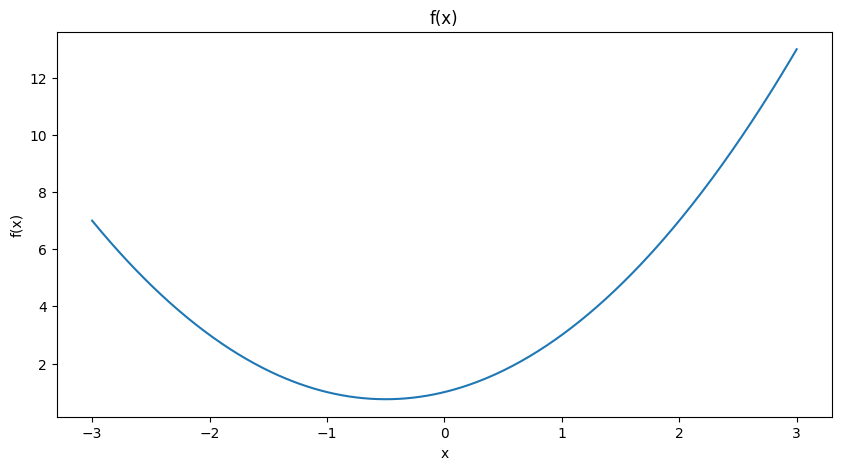

In [4]:
x_1 = np.linspace(start=-3, stop=3, num=500)

plt.figure(figsize=(10, 5))
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [5]:
def slope(x):
  return 2*x + 1


slope(2)

5

# $d(x^n)/dx = n.x^n-1$

Plot the function and the derivative side by side


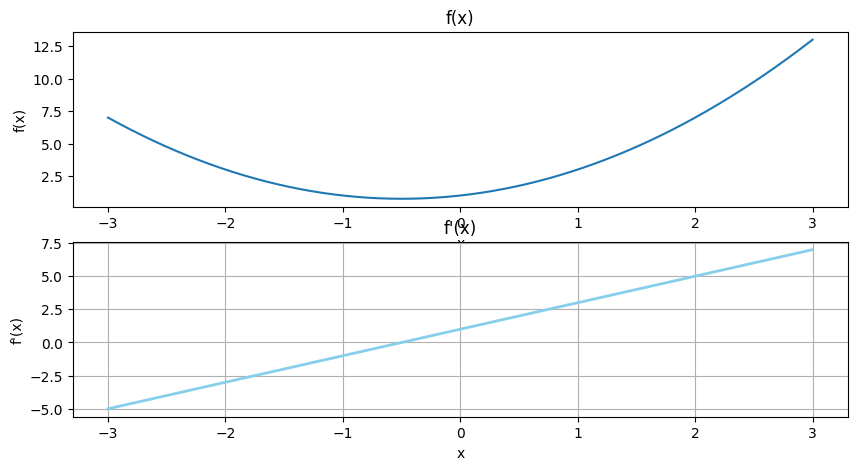

In [6]:
x_1 = np.linspace(start=-3, stop=3, num=500)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1))

plt.subplot(2, 1, 2)
plt.title("f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.plot(x_1, slope(x_1), c='skyblue', linewidth=2)
plt.grid()
plt.show()

## Python loops & Gradient Descent

In [7]:
# python Loop


for n in range(5):
  print('Hello World', n)
  print(n**2)
print('End loop')

Hello World 0
0
Hello World 1
1
Hello World 2
4
Hello World 3
9
Hello World 4
16
End loop


In [8]:
# python while loop

countter = 0

while countter < 5:
  print('Hello World', countter)
  print(countter**2)
  countter += 1
print('End of waiting tine Ready or not, here I come')

Hello World 0
0
Hello World 1
1
Hello World 2
4
Hello World 3
9
Hello World 4
16
End of waiting tine Ready or not, here I come


# Gradient Decsent


In [9]:
import numpy as np

def f(x):
    x=np.array(x)
    return x**2 + x + 1



def df(x):
  x=np.array(x)
  return 2*x + 1




In [10]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
max_iterations = 170
precision = 0.0001
step_size = abs(new_x - previous_x)


x_lst = []
slope_lst = []
cost_lst = []


for n in range(max_iterations):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * df(previous_x)
  x_lst.append(new_x)
  slope_lst.append(gradient)
  cost_lst.append(f(new_x))
  step_size = abs(new_x - previous_x)
  #print(n, "...............",step_size)

  if step_size < precision:
    break


print(n, step_size)

print('Local minimum occurs at x:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

40 9.304595970494045e-05
Local minimum occurs at x: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


#Superimpose the gradient descent chart

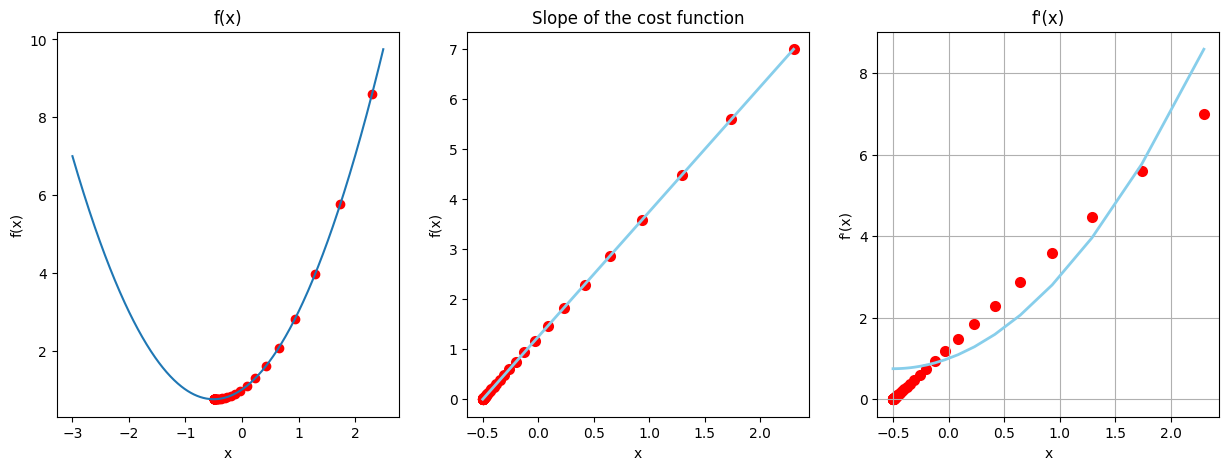

In [11]:
x_plot = np.linspace(start=-3, stop=2.5, num=500)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_plot, f(x_plot))
plt.scatter(x_lst,cost_lst, alpha=1, c='r')



plt.subplot(1, 3, 2)
# plt.scatter(x_1, f(x_1))
plt.title("Slope of the cost function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_lst,slope_lst, c='skyblue', linewidth=2)
plt.scatter(x_lst,slope_lst, c='r', linewidth=2, alpha=1)


plt.subplot(1, 3, 3)
plt.title("f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.plot(x_lst,cost_lst, c='skyblue', linewidth=2)
plt.scatter(x_lst,slope_lst, c='r', linewidth=2, alpha=1)

plt.grid()
plt.show()

# Example 2 - Multiple Minima vs Initial Guesses & Advanced functions

##$$
g(x) = x^4 - 4x^2 + 5$$

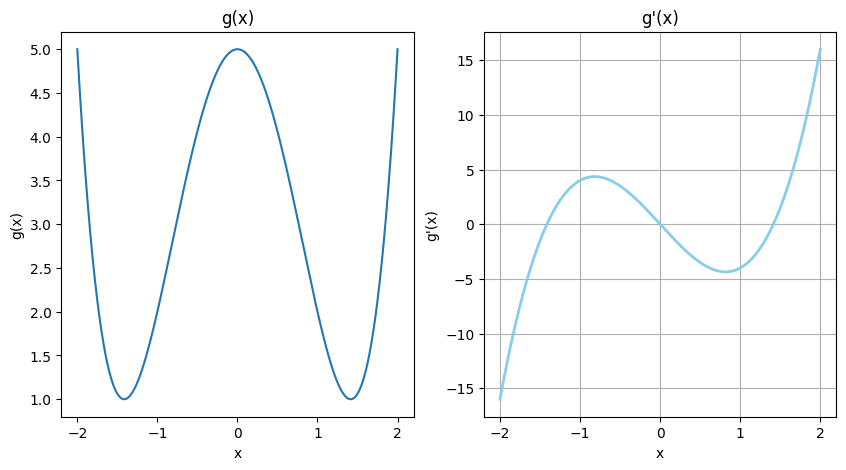

In [12]:
# Make some data

x_2 = np.linspace(-2,2,1000)


def g(x):
  x=np.array(x)
  return x**4 - 4*x**2 + 5

def dg(x):
  x=np.array(x)
  return 4*x**3 - 8*x




plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("g(x)")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.plot(x_2, g(x_2))


plt.subplot(1, 2, 2)
plt.title("g'(x)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.plot(x_2, dg(x_2), c='skyblue', linewidth=2)
plt.grid()
plt.show()


##Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, step_multiplier, precision, max_iterations):
      new_x = initial_guess
      x_lst = [new_x]
      slope_lst = [derivative_func(new_x)]

      for n in range(max_iterations):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - step_multiplier * gradient
        x_lst.append(new_x)
        slope_lst.append(gradient)
        step_size = abs(new_x - previous_x)
        #print(n, "...............",step_size)

        if step_size < precision:
          break

      return new_x, x_lst, slope_lst

local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001, 500)
print('Local minimum occurs at x:', local_min)
print('Slope or df(x) value at this point is:', dg(local_min))
print('f(x) value or cost at this point is:', g(local_min))
print('Number of steps:', len(list_x))

Local minimum occurs at x: 1.4122375085019094
Slope or df(x) value at this point is: -0.03155062633818417
f(x) value or cost at this point is: 1.00003119467776
Number of steps: 23


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-.1, step_multiplier=0.02, precision=0.001, max_iterations=500)
print('Local minimum occurs at x:', local_min)
print('Slope or df(x) value at this point is:', dg(local_min))
print('f(x) value or cost at this point is:', g(local_min))
print('Number of steps:', len(list_x))

Local minimum occurs at x: -1.4120887490901561
Slope or df(x) value at this point is: 0.03392043166866365
f(x) value or cost at this point is: 1.000036064405096
Number of steps: 34


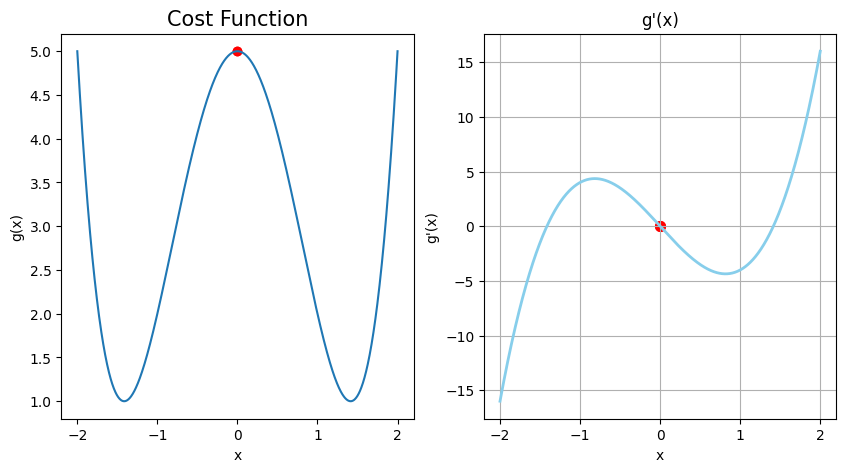

In [15]:
# Calling gradient descent function
# the optimal solutiond epends on the initial_guess and if you completly guess range out of the local global minima, be sure never to land on the global minima, what we can do is to have an array of initial guess to systematically explore --this is technically a random search ir stochastic gradient descent implementation

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0, step_multiplier=0.02, precision=0.001, max_iterations=500)

# Plot function and derivatives and scatter plot side by side



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Cost Function", fontsize=15)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(list_x), c='r')


plt.subplot(1, 2, 2)
plt.title("g'(x)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.plot(x_2, dg(x_2), c='skyblue', linewidth=2)
plt.scatter(list_x, deriv_list, c='r', linewidth=2, alpha=1)
plt.grid()
plt.show()

#Example 3 - Divergence, Overflow and Python Tuples

##$$h(x) = x^5 - 2x^4 + 2$$

In [16]:
# Make data

x_3 = np.linspace(start=-2.5,stop=2.5, num=1000)

def h(x):
  x=np.array(x)
  return x**5 - 2*x**4 + 2

def dh(x):
  x=np.array(x)
  return 5*x**4 - 8*x**3




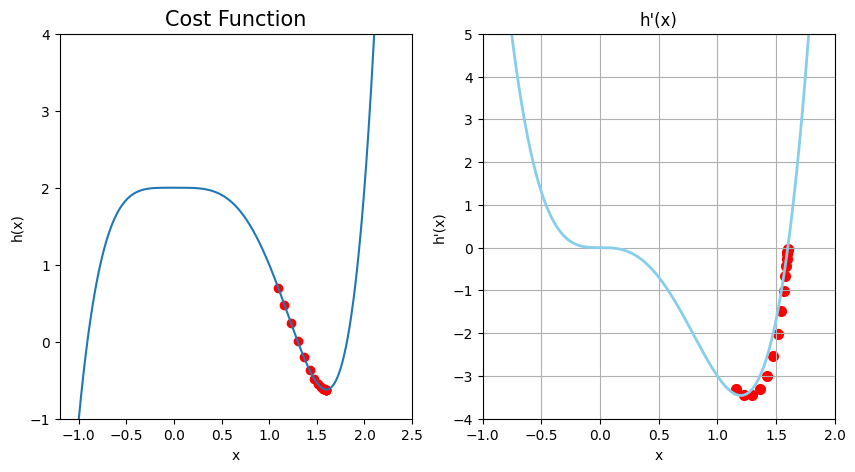

Local minimum occurs at x: 1.5990185897561828
Slope or df(x) value at this point is: -0.020062318898041553
f(x) value or cost at this point is: -0.6214301492732535


In [18]:
# Calling gradient descent function
# the optimal solutiond epends on the initial_guess and if you completly guess range out of the local global minima, be sure never to land on the global minima, what we can do is to have an array of initial guess to systematically explore --this is technically a random search ir stochastic gradient descent implementation

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=2.5, step_multiplier=0.02, precision=0.001, max_iterations=500)

# Plot function and derivatives and scatter plot side by side



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Cost Function", fontsize=15)
plt.xlabel("x")
plt.ylabel("h(x)")
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.plot(x_3, h(x_3))
plt.scatter(list_x, h(list_x), c='r')


plt.subplot(1, 2, 2)
plt.title("h'(x)")
plt.xlabel("x")
plt.ylabel("h'(x)")
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.plot(x_3, dh(x_3), c='skyblue', linewidth=2)
plt.scatter(list_x, deriv_list, c='r', linewidth=2, alpha=1)
plt.grid()
plt.show()


print('Local minimum occurs at x:', local_min)
print('Slope or df(x) value at this point is:', dh(local_min))
print('f(x) value or cost at this point is:', h(local_min))